외부 라이브러리 import

In [40]:
import numpy as np
import matplotlib.pyplot as plt

lr, 반복횟수 설정

In [23]:
learning_rate = 1e-4
iteration = 10000

독립변수, 종속변수 설정

In [16]:
x = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], 
[7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], 
[6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])

선형 회귀는 W(weight) 와 b(bias) 를 조절해가며 학습 데이터와 자신의 예측 데이터 간의 오차를 줄이는 작업을 수행한다. 이를 학습이라고 하며 선형 회귀는 기본적으로 경사 하강법을 사용하여 학습을 진행한다.

In [17]:
a = np.zeros((1,1))
b = np.zeros((1,1))

zeros
zeros는 0으로 가득 찬 array를 생성합니다.
np.zeros(shape, dtype, order)

In [18]:
def prediction(a,b,x):
    eq = a*x + b
    return eq

In [19]:
error = y-prediction(a,b,x)

두 값의 차이로 loss fuction 구현
오차 값이 0 인 해 a,b 를 경사 하강법으로 구현
미분값이 0인 방향으로 조금씩 이동

error = y - (a*x+b)
loss function 를 제곱 평균 오차로 표현 
loss_function(a,b) = 1/n*sigma(1,n) : (error)^2
이를 a 에 대해 편미분하면 
2/n*(-x)*sigma(1,n) : (error)
이를 내적으로 표현하면 
-2/n*sigma(1,n) : x . (error)
이를 b 에 대해 편미분하면 
-2/n*sigma(1,n) : (error)

In [22]:
print(error)

[[5.64413093]
 [3.75876583]
 [3.8723331 ]
 [4.40990425]
 [6.4384502 ]
 [4.02827829]
 [2.26105955]
 [7.15768995]
 [6.29097441]
 [5.19692852]]


In [25]:
def update_ab(a,b,x,error,lr):
    delta_a = -(lr*(2/len(error))*(np.dot(x.T, error)))
    delta_b = -(lr*(2/len(error))*np.sum(error))
    
    return delta_a, delta_b

경사하강법  

In [30]:
def gradient_descent(x, y, iteration):

    a = np.zeros((1,1))
    b = np.zeros((1,1))
    
    for i in range(iteration):
        error = y - prediction(a,b,x)
        a_delta, b_delta = update_ab(a,b,x,error, lr = learning_rate)
        a -= a_delta
        b -= b_delta
    
    return a, b

In [31]:
def plotting_graph(x,y,a,b):
    y_pred=a[0,0]*x+b
    plt.scatter(x, y)
    plt.plot(x, y_pred)
    plt.savefig("test.png")

In [37]:
def main():
    a, b = gradient_descent(x, y, iteration)
    print("a:",a, "b:",b)
    plotting_graph(x,y,a,b)

a: [[0.64716734]] b: [[0.96099787]]


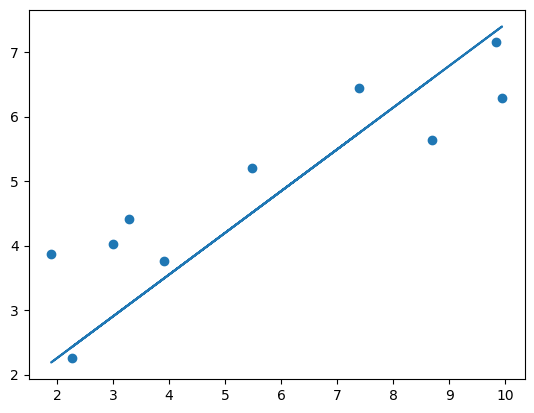

In [38]:
main()

SDEM 분석

p - value 계산 

In [48]:
from scipy import stats

In [49]:
t, pvalue = stats.ttest_ind(y, x)
print(pvalue)

[0.55526857]


In [ ]:
def calculate_p_value(x, y, a, b):
    n = len(y)
    
    # 예측 값 계산
    y_pred = prediction(a, b, x)
    
    # 잔차 계산
    residuals = y - y_pred
    
    # 잔차의 분산
    residual_sum_of_squares = np.sum(residuals**2)
    residual_variance = residual_sum_of_squares / (n - 2)
    
    # x의 분산
    x_mean = np.mean(x)
    s_xx = np.sum((x - x_mean) ** 2)
    
    # a와 b의 표준 오차 계산
    se_a = np.sqrt(residual_variance / s_xx)
    se_b = np.sqrt(residual_variance * (1/n + (x_mean ** 2) / s_xx))
    
    # t-값 계산
    t_a = a / se_a
    t_b = b / se_b
    
    # 자유도
    df = n - 2
    
    # p-value 계산 (이중 측정이므로 두 배로 계산)
    p_value_a = 2 * (1 - stats.t.cdf(np.abs(t_a), df))
    p_value_b = 2 * (1 - stats.t.cdf(np.abs(t_b), df))
    
    return p_value_a, p_value_b